# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
1000/1000 - 0s - loss: 24.5755
Epoch 2/100
1000/1000 - 0s - loss: 1.1773
Epoch 3/100
1000/1000 - 0s - loss: 0.4253
Epoch 4/100
1000/1000 - 0s - loss: 0.3853
Epoch 5/100
1000/1000 - 0s - loss: 0.3727
Epoch 6/100
1000/1000 - 0s - loss: 0.3932
Epoch 7/100
1000/1000 - 0s - loss: 0.3817
Epoch 8/100
1000/1000 - 0s - loss: 0.3877
Epoch 9/100
1000/1000 - 0s - loss: 0.3729
Epoch 10/100
1000/1000 - 0s - loss: 0.3982
Epoch 11/100
1000/1000 - 0s - loss: 0.3809
Epoch 12/100
1000/1000 - 0s - loss: 0.3788
Epoch 13/100
1000/1000 - 0s - loss: 0.3714
Epoch 14/100
1000/1000 - 0s - loss: 0.3608
Epoch 15/100
1000/1000 - 0s - loss: 0.3507
Epoch 16/100
1000/1000 - 0s - loss: 0.3918
Epoch 17/100
1000/1000 - 0s - loss: 0.3697
Epoch 18/100
1000/1000 - 0s - loss: 0.3811
Epoch 19/100
1000/1000 - 0s - loss: 0.3781
Epoch 20/100
1000/1000 - 0s - loss: 0.3974
Epoch 21/100
1000/1000 - 0s - loss: 0.3974
Epoch 22/100
1000/1000 - 0s - loss: 0.3724
Epoch 23/100
1000/1000 - 0s - loss: 0.3561
Epoch 24/100
1000/1

## Extract the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 1.9776261],
        [-2.9764102]], dtype=float32), array([4.975083], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9776261],
       [-2.9764102]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.975083], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ -9.8],
       [  9.9],
       [ -6. ],
       [ 17.9],
       [  4.5],
       [ 22.8],
       [  2.5],
       [-10.9],
       [ 19.4],
       [-10. ],
       [ 34.2],
       [  6.4],
       [-26.7],
       [-27.8],
       [ -7.8],
       [ 17.1],
       [ 27.4],
       [ 15.3],
       [-15. ],
       [-21.2],
       [  9.4],
       [-19.3],
       [ 14.5],
       [ 26.3],
       [ 21.9],
       [ -0.3],
       [ -7.9],
       [ 28.2],
       [  1.7],
       [-14.2],
       [ 13.1],
       [ 11.5],
       [ -1.2],
       [ 25.2],
       [  0.3],
       [  6.6],
       [ -6. ],
       [ 17.6],
       [ 12.7],
       [  8.3],
       [ -7.8],
       [ 25. ],
       [ -3.8],
       [ 10.5],
       [  8. ],
       [ 12.3],
       [ 18.5],
       [  6.4],
       [  7.6],
       [  1.6],
       [  8.5],
       [-26.9],
       [ -8.7],
       [ 30.6],
       [ 10. ],
       [  1.1],
       [  5.5],
       [-13.1],
       [-15.7],
       [-32.8],
       [ 12. ],
       [ -9.9],
       [

In [9]:
training_data['targets'].round(1)

array([[ -9.8],
       [  9.5],
       [ -7. ],
       [ 17.1],
       [  3.9],
       [ 22.5],
       [  1.7],
       [-10.1],
       [ 20. ],
       [-10.1],
       [ 34.2],
       [  5.6],
       [-28. ],
       [-28.5],
       [ -8.4],
       [ 18.1],
       [ 28. ],
       [ 15. ],
       [-15.4],
       [-20.9],
       [  9.1],
       [-19.5],
       [ 14.3],
       [ 27.1],
       [ 22.1],
       [ -1.2],
       [ -8.3],
       [ 28.4],
       [  1. ],
       [-13.5],
       [ 13.4],
       [ 11.4],
       [ -0.3],
       [ 26. ],
       [  0.9],
       [  5.8],
       [ -5.8],
       [ 18.1],
       [ 12.8],
       [  8.7],
       [ -7.5],
       [ 25.6],
       [ -3.3],
       [ 11.3],
       [  7.9],
       [ 12.5],
       [ 19.7],
       [  6.8],
       [  7.4],
       [  1.4],
       [  7.7],
       [-28.1],
       [ -7.9],
       [ 31.7],
       [ 10.3],
       [  1.2],
       [  4.7],
       [-12.6],
       [-16.6],
       [-33.6],
       [ 11.8],
       [-10.6],
       [

## Plotting the data

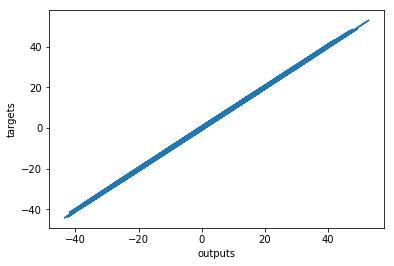

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()